## Setup

In [ ]:
import numpy as np
import scprep
%matplotlib inline

## Loading

In [72]:
data_dir = "/data/lab/datasets/10X-Genomics_2017_4k-pbmcs/filtered_gene_bc_matrices/GRCh38"
data = scprep.io.load_10X(data_dir, gene_labels='both', sparse=False)

data.head()

,RP11-34P13.3 (ENSG00000243485),FAM138A (ENSG00000237613),OR4F5 (ENSG00000186092),RP11-34P13.7 (ENSG00000238009),RP11-34P13.8 (ENSG00000239945),RP11-34P13.14 (ENSG00000239906),RP11-34P13.9 (ENSG00000241599),FO538757.3 (ENSG00000279928),FO538757.2 (ENSG00000279457),AP006222.2 (ENSG00000228463),...,AC007325.2 (ENSG00000277196),BX072566.1 (ENSG00000277630),AL354822.1 (ENSG00000278384),AC023491.2 (ENSG00000278633),AC004556.1 (ENSG00000276345),AC233755.2 (ENSG00000277856),AC233755.1 (ENSG00000275063),AC240274.1 (ENSG00000271254),AC213203.1 (ENSG00000277475),FAM231B (ENSG00000268674)
0,,,,,,,,,,,,,,,,,,,,,
AAACCTGAGAAGGCCT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGACAGACC-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGATAGTCA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGCGCCTCA-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AAACCTGAGGCATGGT-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data.shape

(4342, 33694)

## Preprocessing
### Filtering

In [74]:
# remove any genes expressed in less than 10 cells
data_filt = scprep.filter.filter_rare_genes(data, min_cells=10)
data_filt.shape

(4342, 13592)

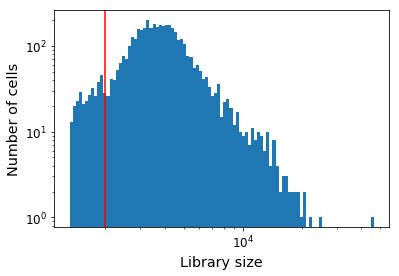

In [75]:
# check the library size distribution
scprep.plot.plot_library_size(data_filt, cutoff=2000)

In [76]:
data_filt = scprep.filter.filter_library_size(data_filt, cutoff=2000)

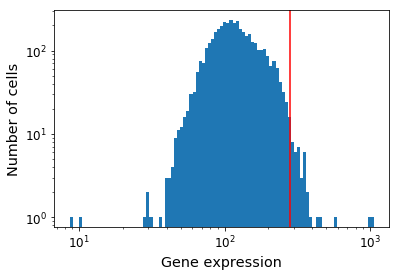

In [82]:
scprep.plot.plot_gene_set_expression(data_filt, starts_with='MT', 
                                     log=True, percentile=99, library_size_normalize=True)

In [83]:
data_filt = scprep.filter.filter_gene_set_expression(data_filt, starts_with='MT', 
                                                     percentile=99, keep_cells='below', 
                                                     library_size_normalize=True)

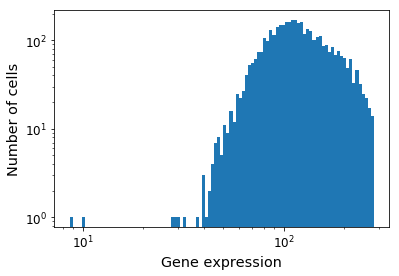

In [84]:
scprep.plot.plot_gene_set_expression(data_filt, starts_with='MT', 
                                     log=True, library_size_normalize=True)

### Normalisation

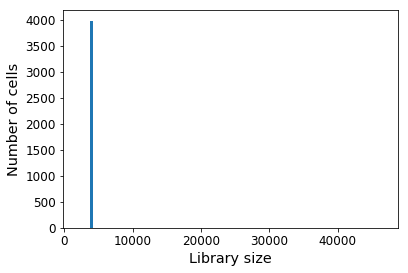

In [85]:
# normalize
data_norm, libsize = scprep.normalize.library_size_normalize(data_filt, return_library_size=True)
# check the library size distribution again
scprep.plot.plot_library_size(data_norm, log=False, range=(np.min(libsize), np.max(libsize)))

### Transformation

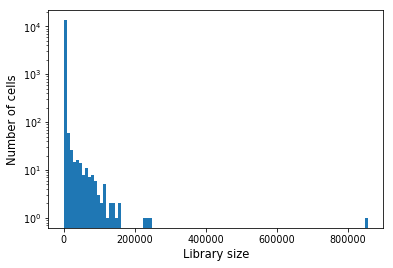

In [86]:
# here's a trick that works because we can simply transpose our matrix
scprep.plot.plot_library_size(data_norm.T, log='y', fontsize=8)
# or: scprep.plot.histogram(data_norm.sum(axis=0))

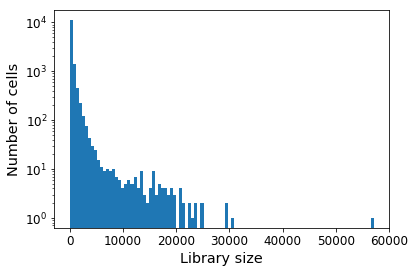

In [87]:
data_sqrt = scprep.transform.sqrt(data_norm)
scprep.plot.plot_library_size(data_sqrt.T, log='y')

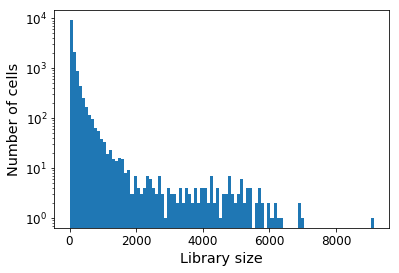

In [88]:
data_log = scprep.transform.log(data_norm)
scprep.plot.plot_library_size(data_log.T, log='y')

Other preprocessing steps people sometimes do:
* remove cells of high library size (as well as low)
* use `log` or `arcsinh` transformations
* scale all genes to have zero mean and unit variance
* scale all genes to have a fixed range

## Visualization

In [89]:
import matplotlib.pyplot as plt
import sklearn.decomposition
import sklearn.manifold
import umap
import phate

In [98]:
data_pca = sklearn.decomposition.PCA(100).fit_transform(data_sqrt)
# tsne requires you to do PCA first
data_tsne = sklearn.manifold.TSNE().fit_transform(data_pca)
data_umap = umap.UMAP().fit_transform(data_sqrt)
# we will use the graph constructed by PHATE for spectral clustering later
phate_op = phate.PHATE(n_jobs=20, verbose=0)
data_phate = phate_op.fit_transform(data_sqrt)

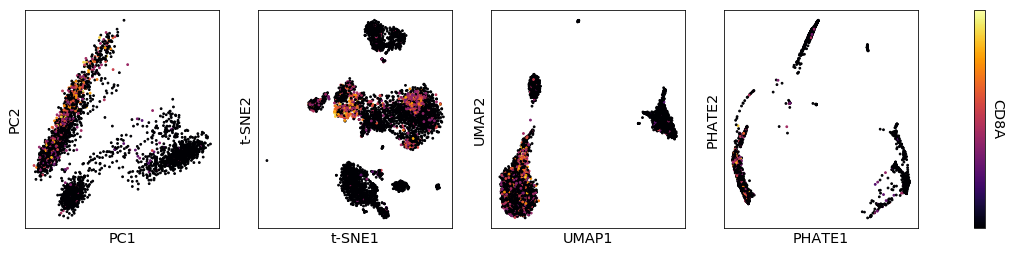

In [124]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
scprep.plot.scatter2d(data_pca, c=scprep.select.select_cols(data_sqrt, exact_word='CD8A'), 
                      ax=axes[0], label_prefix="PC", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_tsne, c=scprep.select.select_cols(data_sqrt, exact_word='CD8A'), 
                      ax=axes[1], label_prefix="t-SNE", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_umap, c=scprep.select.select_cols(data_sqrt, exact_word='CD8A'), 
                      ax=axes[2], label_prefix="UMAP", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_phate, c=scprep.select.select_cols(data_sqrt, exact_word='CD8A'), 
                      ax=axes[3], label_prefix="PHATE", 
                      ticks=False, legend=False)
scprep.plot.tools.generate_colorbar(cmap='inferno', ax=axes, title='CD8A')

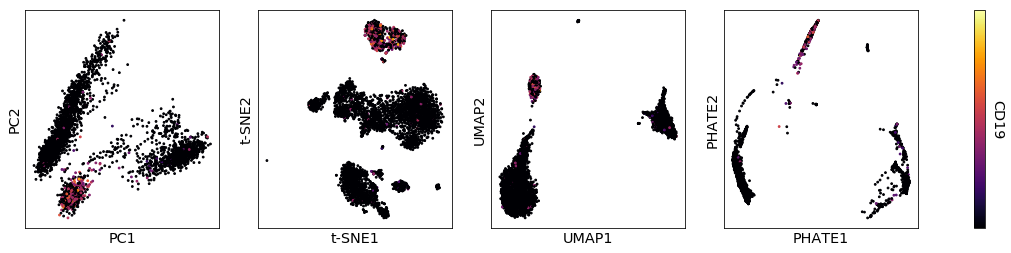

In [125]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
scprep.plot.scatter2d(data_pca, c=scprep.select.select_cols(data_sqrt, exact_word='CD19'), 
                      ax=axes[0], label_prefix="PC", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_tsne, c=scprep.select.select_cols(data_sqrt, exact_word='CD19'), 
                      ax=axes[1], label_prefix="t-SNE", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_umap, c=scprep.select.select_cols(data_sqrt, exact_word='CD19'), 
                      ax=axes[2], label_prefix="UMAP", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_phate, c=scprep.select.select_cols(data_sqrt, exact_word='CD19'), 
                      ax=axes[3], label_prefix="PHATE", 
                      ticks=False, legend=False)
scprep.plot.tools.generate_colorbar(cmap='inferno', ax=axes, title='CD19')

## Clustering

### _k_-means

In [112]:
import sklearn.cluster
clusters_kmeans = sklearn.cluster.KMeans(7, random_state=42).fit_predict(data_pca)

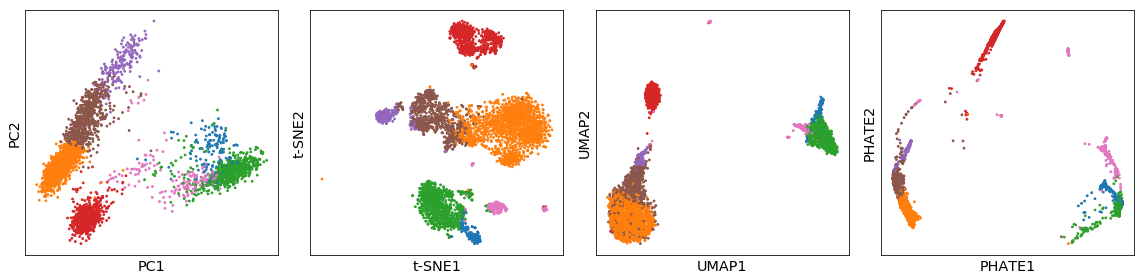

In [113]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
scprep.plot.scatter2d(data_pca, c=clusters_kmeans, ax=axes[0], label_prefix="PC", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_tsne, c=clusters_kmeans, ax=axes[1], label_prefix="t-SNE", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_umap, c=clusters_kmeans, ax=axes[2], label_prefix="UMAP", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_phate, c=clusters_kmeans, ax=axes[3], label_prefix="PHATE", 
                      ticks=False, legend=False)
plt.tight_layout()

### Spectral clustering

In [114]:
clusters_spectral = sklearn.cluster.SpectralClustering(
    7, random_state=42, affinity='precomputed').fit_predict(phate_op.graph.kernel)

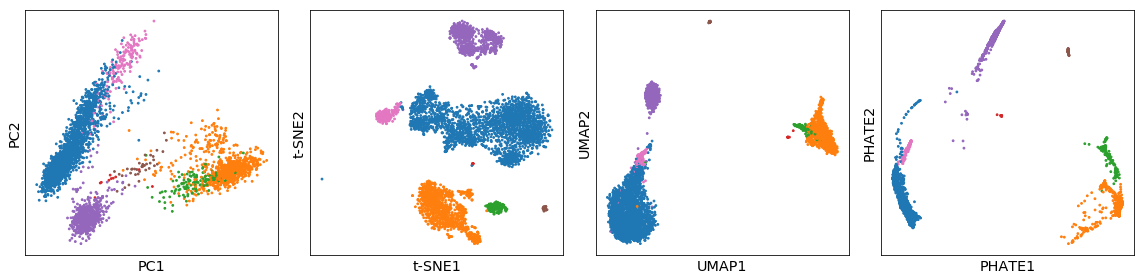

In [116]:
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
scprep.plot.scatter2d(data_pca, c=clusters_spectral, ax=axes[0], label_prefix="PC", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_tsne, c=clusters_spectral, ax=axes[1], label_prefix="t-SNE", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_umap, c=clusters_spectral, ax=axes[2], label_prefix="UMAP", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_phate, c=clusters_spectral, ax=axes[3], label_prefix="PHATE", 
                      ticks=False, legend=False)
plt.tight_layout()

## Supervised Learning

In [159]:
import sklearn.neural_network
nnet_model = sklearn.neural_network.MLPRegressor(hidden_layer_sizes=(32,16,8), verbose=1)
data_cd19 = data_sqrt['CD19 (ENSG00000177455)']
data_except_cd19 = scprep.select.select_cols(data_sqrt, regex="^(?!CD19)")
data_except_cd19_pca = sklearn.decomposition.PCA(100).fit_transform(data_except_cd19)
nnet_model.fit(data_except_cd19_pca, data_cd19)

Iteration 1, loss = 0.27850342
Iteration 2, loss = 0.07828641
Iteration 3, loss = 0.06082565
Iteration 4, loss = 0.05184002
Iteration 5, loss = 0.04671227
Iteration 6, loss = 0.04287756
Iteration 7, loss = 0.03991852
Iteration 8, loss = 0.03756586
Iteration 9, loss = 0.03563633
Iteration 10, loss = 0.03425581
Iteration 11, loss = 0.03265020
Iteration 12, loss = 0.03134190
Iteration 13, loss = 0.03023103
Iteration 14, loss = 0.02907238
Iteration 15, loss = 0.02800977
Iteration 16, loss = 0.02695911
Iteration 17, loss = 0.02601778
Iteration 18, loss = 0.02523136
Iteration 19, loss = 0.02442392
Iteration 20, loss = 0.02362955
Iteration 21, loss = 0.02291262
Iteration 22, loss = 0.02229916
Iteration 23, loss = 0.02153082
Iteration 24, loss = 0.02088697
Iteration 25, loss = 0.02025586
Iteration 26, loss = 0.01964220
Iteration 27, loss = 0.01914948
Iteration 28, loss = 0.01846296
Iteration 29, loss = 0.01794938
Iteration 30, loss = 0.01737412
Iteration 31, loss = 0.01675163
Iteration 32, los

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(32, 16, 8), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=1, warm_start=False)

In [160]:
cd19_predicted = nnet_model.predict(data_except_cd19_pca)

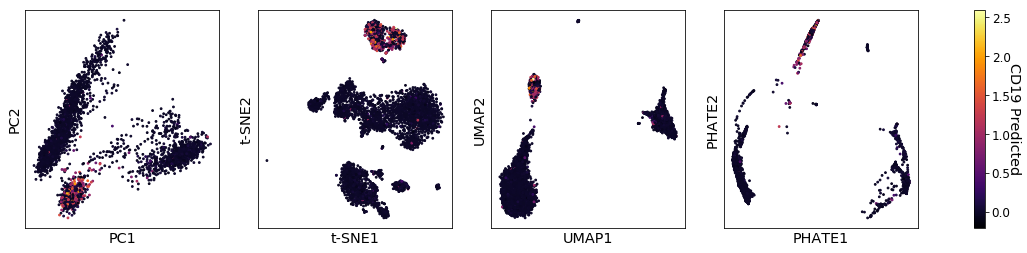

In [164]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
scprep.plot.scatter2d(data_pca, c=cd19_predicted, ax=axes[0], label_prefix="PC", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_tsne, c=cd19_predicted, ax=axes[1], label_prefix="t-SNE", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_umap, c=cd19_predicted, ax=axes[2], label_prefix="UMAP", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_phate, c=cd19_predicted, ax=axes[3], label_prefix="PHATE", 
                      ticks=False, legend=False)
scprep.plot.tools.generate_colorbar(vmin=np.min(cd19_predicted), vmax=np.max(cd19_predicted), cmap='inferno', ax=axes, title='CD19 Predicted')

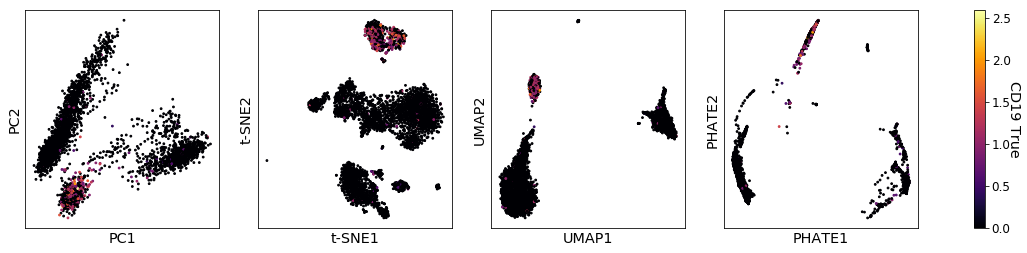

In [167]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
scprep.plot.scatter2d(data_pca, c=data_cd19, ax=axes[0], label_prefix="PC", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_tsne, c=data_cd19, ax=axes[1], label_prefix="t-SNE", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_umap, c=data_cd19, ax=axes[2], label_prefix="UMAP", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_phate, c=data_cd19, ax=axes[3], label_prefix="PHATE", 
                      ticks=False, legend=False)
scprep.plot.tools.generate_colorbar(vmin=np.min(data_cd19), vmax=np.max(data_cd19), cmap='inferno', ax=axes, title='CD19 True')

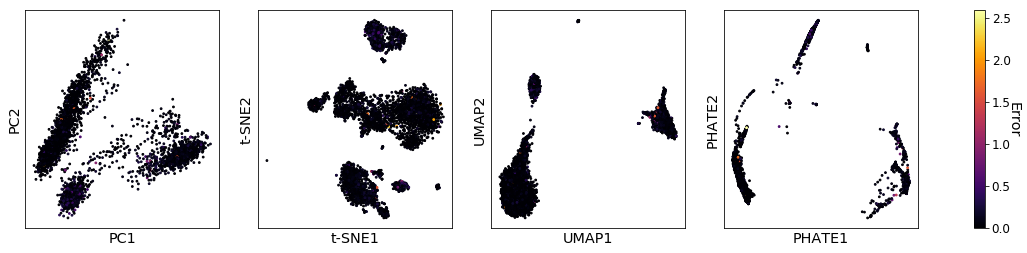

In [169]:
fig, axes = plt.subplots(1, 4, figsize=(20, 4))
scprep.plot.scatter2d(data_pca, c=np.abs(cd19_predicted - data_cd19), ax=axes[0], label_prefix="PC", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_tsne, c=np.abs(cd19_predicted - data_cd19), ax=axes[1], label_prefix="t-SNE", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_umap, c=np.abs(cd19_predicted - data_cd19), ax=axes[2], label_prefix="UMAP", 
                      ticks=False, legend=False)
scprep.plot.scatter2d(data_phate, c=np.abs(cd19_predicted - data_cd19), ax=axes[3], label_prefix="PHATE", 
                      ticks=False, legend=False)
scprep.plot.tools.generate_colorbar(vmin=np.min(data_cd19), vmax=np.max(data_cd19), cmap='inferno', ax=axes, title='Error')